# EDA For Physician Availability and Graduation Rates (Supply-side factors)

Kelvin

In [1]:
# Import dependencies
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# load the data
master_path = "datasets"
supply_side_phys_df = pd.read_csv(f"{master_path}/supply_side_physicians.csv", delimiter=";")
supply_side_phys_df.head()

,State,Total Active Physicians,Percentage 65 and older,Percentage under 40,MD Residents/Fellows,Population
0,Alabama,11646,26.2,17.5,1160.0,5117673
1,Alaska,2143,23.0,14.8,12.0,736510
2,Arizona,18998,24.0,13.6,1303.0,7473027
3,Arkansas,6979,NaN,NaN,530.0,3069463
4,California,120957,25.0,15.3,10415.0,39198693


In [3]:
supply_side_phys_df.isna().sum()

State                       0
Total Active Physicians     0
Percentage 65 and older    14
Percentage under 40        14
MD Residents/Fellows        1
Population                  0
dtype: int64

In [4]:
# Replace null values with mean
supply_side_phys_df['Percentage 65 and older'].fillna(supply_side_phys_df['Percentage 65 and older'].mean(), inplace=True)
supply_side_phys_df['Percentage under 40'].fillna(supply_side_phys_df['Percentage under 40'].mean(), inplace=True)
# Filling Wyoming's residents according to its population ratio with the country
supply_side_phys_df['MD Residents/Fellows'] = supply_side_phys_df.apply(
    lambda row: (row['Population'] / supply_side_phys_df['Population'].sum()) * supply_side_phys_df['MD Residents/Fellows'].sum()
    if pd.isna(row['MD Residents/Fellows']) else row['MD Residents/Fellows'], axis=1
)

C:\Users\WPB54760\AppData\Local\Temp\ipykernel_18996\628972040.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  supply_side_phys_df['Percentage 65 and older'].fillna(supply_side_phys_df['Percentage 65 and older'].mean(), inplace=True)
C:\Users\WPB54760\AppData\Local\Temp\ipykernel_18996\628972040.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the interme

In [5]:
supply_side_phys_df['Physicians per 1K'] = supply_side_phys_df['Total Active Physicians']/supply_side_phys_df['Population']*1000
supply_side_phys_df['Residents per 1K'] = supply_side_phys_df['MD Residents/Fellows']/supply_side_phys_df['Population']*1000
supply_side_phys_df.head()

,State,Total Active Physicians,Percentage 65 and older,Percentage under 40,MD Residents/Fellows,Population,Physicians per 1K,Residents per 1K
0,Alabama,11646,26.200000,17.500000,1160.0,5117673,2.275644,0.226666
1,Alaska,2143,23.000000,14.800000,12.0,736510,2.909669,0.016293
2,Arizona,18998,24.000000,13.600000,1303.0,7473027,2.542209,0.174360
3,Arkansas,6979,22.827027,16.605405,530.0,3069463,2.273688,0.172669
4,California,120957,25.000000,15.300000,10415.0,39198693,3.085741,0.265698


In [6]:
supply_side_phys_df.describe()

,Total Active Physicians,Percentage 65 and older,Percentage under 40,MD Residents/Fellows,Population,Physicians per 1K,Residents per 1K
count,51.000000,51.000000,51.000000,51.000000,5.100000e+01,51.000000,51.000000
mean,19612.705882,22.827027,16.605405,1812.888811,6.604044e+06,3.005727,0.275996
std,22889.276289,1.910670,1.751222,2278.329698,7.516975e+06,1.051063,0.240421
min,1281.000000,18.400000,11.800000,12.000000,5.850670e+05,1.925807,0.016293
25%,5223.000000,22.100000,15.800000,459.000000,1.870808e+06,2.456159,0.168498
50%,13244.000000,22.827027,16.605405,1160.000000,4.550595e+06,2.860513,0.232013
75%,24675.500000,23.700000,17.450000,1985.500000,7.665174e+06,3.190242,0.314294
max,120957.000000,27.400000,21.500000,10415.000000,3.919869e+07,9.120880,1.697889


In [7]:
supply_side_phys_df[supply_side_phys_df['State'] == 'Wyoming']

,State,Total Active Physicians,Percentage 65 and older,Percentage under 40,MD Residents/Fellows,Population,Physicians per 1K,Residents per 1K
50,Wyoming,1281,22.827027,16.605405,160.329364,585067,2.189493,0.274036


In [8]:
# Top and bottom states for physician and resident density
top_physician_states = supply_side_phys_df.nlargest(5, "Physicians per 1K")[["State", "Physicians per 1K"]]
bottom_physician_states = supply_side_phys_df.nsmallest(5, "Physicians per 1K")[["State", "Physicians per 1K"]]

top_resident_states = supply_side_phys_df.nlargest(5, "Residents per 1K")[["State", "Residents per 1K"]]
bottom_resident_states = supply_side_phys_df.nsmallest(5, "Residents per 1K")[["State", "Residents per 1K"]]

In [9]:
top_physician_states

,State,Physicians per 1K
8,District of Columbia,9.120880
21,Massachusetts,4.810963
32,New York,4.096392
45,Vermont,4.001801
20,Maryland,3.997547


In [10]:
bottom_physician_states

,State,Physicians per 1K
12,Idaho,1.925807
24,Mississippi,2.051868
36,Oklahoma,2.118664
28,Nevada,2.174925
50,Wyoming,2.189493


In [11]:
top_resident_states

,State,Residents per 1K
8,District of Columbia,1.697889
21,Massachusetts,0.648830
39,Rhode Island,0.641636
32,New York,0.511922
38,Pennsylvania,0.427110


In [12]:
bottom_resident_states

,State,Residents per 1K
1,Alaska,0.016293
26,Montana,0.030054
12,Idaho,0.050733
41,South Dakota,0.087117
28,Nevada,0.109508


# EDA For State GDP Healthcare

In [23]:
# load the data
master_path = "datasets"
state_gdp_df = pd.read_csv(f"{master_path}/state_gdp_healthcare.csv", delimiter=";")
state_gdp_df.head()

,State,Region,1980,1981,1982,1983,1984,1985,1986,1987,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Connecticut,New England,7.70%,7.90%,8.20%,8.30%,8.00%,8.00%,8.20%,8.40%,...,13.70%,13.70%,14.00%,14.30%,14.20%,14.40%,14.40%,14.50%,14.60%,16.10%
1,Maine,New England,9.50%,9.90%,10.40%,10.50%,10.10%,10.20%,10.20%,10.30%,...,21.00%,21.00%,20.80%,20.80%,21.30%,21.50%,21.60%,21.80%,22.00%,23.00%
2,Massachusetts,New England,9.60%,9.80%,10.20%,10.00%,9.60%,9.40%,9.50%,9.70%,...,15.60%,15.40%,15.40%,15.40%,15.40%,15.60%,15.50%,15.30%,15.20%,16.10%
3,New Hampshire,New England,7.30%,7.60%,8.00%,8.00%,7.70%,7.80%,8.10%,8.30%,...,16.90%,16.80%,16.70%,16.60%,16.50%,16.60%,16.90%,17.00%,16.90%,17.80%
4,Rhode Island,New England,10.20%,10.30%,10.80%,11.30%,11.10%,11.20%,11.20%,11.30%,...,18.30%,18.30%,18.10%,18.40%,18.60%,18.80%,18.80%,18.80%,18.90%,20.40%


In [4]:
state_gdp_df.shape

(51, 43)

In [15]:
state_gdp_df.isnull().sum()

State     0
Region    0
1980      0
1981      0
1982      0
1983      0
1984      0
1985      0
1986      0
1987      0
1988      0
1989      0
1990      0
1991      0
1992      0
1993      0
1994      0
1995      0
1996      0
1997      0
1998      0
1999      0
2000      0
2001      0
2002      0
2003      0
2004      0
2005      0
2006      0
2007      0
2008      0
2009      0
2010      0
2011      0
2012      0
2013      0
2014      0
2015      0
2016      0
2017      0
2018      0
2019      0
2020      0
dtype: int64

In [16]:
state_gdp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 43 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   State   51 non-null     object
 1   Region  51 non-null     object
 2   1980    51 non-null     object
 3   1981    51 non-null     object
 4   1982    51 non-null     object
 5   1983    51 non-null     object
 6   1984    51 non-null     object
 7   1985    51 non-null     object
 8   1986    51 non-null     object
 9   1987    51 non-null     object
 10  1988    51 non-null     object
 11  1989    51 non-null     object
 12  1990    51 non-null     object
 13  1991    51 non-null     object
 14  1992    51 non-null     object
 15  1993    51 non-null     object
 16  1994    51 non-null     object
 17  1995    51 non-null     object
 18  1996    51 non-null     object
 19  1997    51 non-null     object
 20  1998    51 non-null     object
 21  1999    51 non-null     object
 22  2000    51 non-null     obje

In [17]:
state_gdp_df.describe()

,State,Region,1980,1981,1982,1983,1984,1985,1986,1987,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
count,51,51,51,51,51,51,51,51,51,51,...,51,51,51,51,51,51,51,51,51,51
unique,51,8,30,30,32,31,31,30,32,34,...,36,38,41,40,43,42,42,42,40,39
top,Connecticut,Southeast,7.10%,8.70%,9.10%,7.80%,8.70%,7.80%,8.80%,10.20%,...,14.20%,16.80%,13.50%,14.00%,14.20%,13.20%,17.30%,16.20%,16.20%,15.80%
freq,1,12,5,4,4,4,4,4,5,4,...,3,4,3,3,3,3,3,4,3,3


In [14]:
grouped = state_gdp_df.groupby("Region")

for name, group in grouped:
    print(f"Group: {name}")
    print(group)

Group: Far West
         State    Region   1980   1981   1982   1983   1984   1985    1986  \
45      Alaska  Far West  3.00%  2.40%  2.50%  3.10%  3.20%  3.40%   5.00%   
46  California  Far West  8.00%  8.30%  8.90%  8.90%  8.50%  8.80%   8.90%   
47      Hawaii  Far West  6.70%  7.30%  7.90%  7.80%  7.60%  7.80%   7.80%   
48      Nevada  Far West  7.10%  7.70%  8.20%  8.50%  8.40%  8.50%   8.60%   
49      Oregon  Far West  7.90%  8.70%  9.60%  9.70%  9.40%  9.70%  10.00%   
50  Washington  Far West  7.10%  7.40%  7.80%  8.00%  8.00%  8.60%   8.70%   

      1987  ...    2011    2012    2013    2014    2015    2016    2017  \
45   4.40%  ...  11.40%  11.90%  12.30%  13.10%  15.80%  16.50%  16.40%   
46   9.00%  ...  12.60%  12.80%  12.60%  12.50%  12.80%  12.90%  12.60%   
47   8.00%  ...  13.00%  13.20%  13.20%  13.50%  13.70%  13.80%  14.00%   
48   8.50%  ...  12.60%  12.70%  13.00%  13.70%  13.50%  13.90%  13.80%   
49  10.00%  ...  16.00%  16.10%  16.20%  16.70%  17.00%  17.00

In [15]:
# Select columns from 1980 to 2020
gdp_columns = [str(year) for year in range(1980, 2021)]


In [16]:
#gdp_columns

In [ ]:
'''
total = 0.0

for index, row in state_gdp_df.iterrows():
    print(row["State"])  # Print the state name
    for g in gdp_columns:
        #print(row[g])  # Print the GDP value for each column in gdp_columns
        clean = float(row[g].replace("%",""))
        total += clean
        #print(total)
    print(total)
    Avg = total / len(state_gdp_df)
    print(Avg)

'''



'\ntotal = 0.0\n\n# Assuming \'state_gdp_df\' is a pandas DataFrame and \'gdp_columns\' is a list of GDP-related column names\nfor index, row in state_gdp_df.iterrows():\n    print(row["State"])  # Print the state name\n    for g in gdp_columns:\n        #print(row[g])  # Print the GDP value for each column in gdp_columns\n        clean = float(row[g].replace("%",""))\n        total += clean\n        #print(total)\n    print(total)\n    Avg = total / len(state_gdp_df)\n    print(Avg)\n\nIt looks like you\'re working with a DataFrame in Python and trying to iterate over its rows to print the "State" column and corresponding \nGDP values from specific columns (gdp_columns). There might be a small issue with your inner loop. s[g] might throw an error because s is\n likely just a string representing the state name (not a row object).  leverages the iterrows() function, which gives you both the index \n and the row as a Series object. This way, you can access the GDP values in the specified

In [25]:
'''
total = 0
for index, row in state_gdp_df.iterrows():
    print(row["State"])  # Print the state name
    for g in gdp_columns:
        #print(row[g])  # Print the GDP value for each column in gdp_columns
        clean = float(row[g].replace("%",""))
        total += clean
        #print(total)
    print(total)
    Avg = total / len(state_gdp_df)
    print(Avg)
    '''

'\ntotal = 0\nfor index, row in state_gdp_df.iterrows():\n    print(row["State"])  # Print the state name\n    for g in gdp_columns:\n        #print(row[g])  # Print the GDP value for each column in gdp_columns\n        clean = float(row[g].replace("%",""))\n        total += clean\n        #print(total)\n    print(total)\n    Avg = total / len(state_gdp_df)\n    print(Avg)\n    '

In [26]:
'''
# Convert GDP columns to numeric (removing "%" if necessary)
for col in gdp_columns:
    state_gdp_df[col] = state_gdp_df[col].str.replace("%", "").astype(float)

# Calculate the average for each state and add it as a new column
# Row-wise Mean Calculation: The .mean(axis=1) method calculates the average for each row (state) across the specified gdp_columns
state_gdp_df["avg"] = state_gdp_df[gdp_columns].mean(axis=1)

# Print the updated DataFrame to verify
print(state_gdp_df)
'''


'\n# Convert GDP columns to numeric (removing "%" if necessary)\nfor col in gdp_columns:\n    state_gdp_df[col] = state_gdp_df[col].str.replace("%", "").astype(float)\n\n# Calculate the average for each state and add it as a new column\n# Row-wise Mean Calculation: The .mean(axis=1) method calculates the average for each row (state) across the specified gdp_columns\nstate_gdp_df["avg"] = state_gdp_df[gdp_columns].mean(axis=1)\n\n# Print the updated DataFrame to verify\nprint(state_gdp_df)\n'

In [23]:
state_gdp_df["Region"].unique()

array(['New England', 'Mideast', 'Great Lakes', 'Plains', 'Southeast',
       'Southwest', 'Rocky Mountains', 'Far West'], dtype=object)

In [27]:
# Step 1: Strip '%' and convert GDP columns to float
state_gdp_df[gdp_columns] = state_gdp_df[gdp_columns].replace('%', '', regex=True).astype(float)

# Step 2: Calculate average GDP
state_gdp_df["avg"] = state_gdp_df[gdp_columns].mean(axis=1)

# Step 3: Print the updated DataFrame
print(state_gdp_df)


                   State           Region  1980  1981  1982  1983  1984  1985  \
0            Connecticut      New England   7.7   7.9   8.2   8.3   8.0   8.0   
1                  Maine      New England   9.5   9.9  10.4  10.5  10.1  10.2   
2          Massachusetts      New England   9.6   9.8  10.2  10.0   9.6   9.4   
3          New Hampshire      New England   7.3   7.6   8.0   8.0   7.7   7.8   
4           Rhode Island      New England  10.2  10.3  10.8  11.3  11.1  11.2   
5                Vermont      New England   7.9   8.2   9.1   9.0   8.7   8.7   
6               Delaware          Mideast   6.7   6.7   7.2   7.1   7.2   7.5   
7   District of Columbia          Mideast   6.8   7.0   7.5   7.7   7.9   7.9   
8               Maryland          Mideast   8.5   8.8   9.2   9.1   9.1   9.0   
9             New Jersey          Mideast   7.2   7.4   7.8   7.8   7.8   7.8   
10              New York          Mideast   8.1   8.2   8.4   8.5   8.5   8.7   
11          Pennsylvania    

C:\Users\WPB54760\AppData\Local\Temp\ipykernel_18200\1788050804.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  state_gdp_df[gdp_columns] = state_gdp_df[gdp_columns].replace('%', '', regex=True).astype(float)


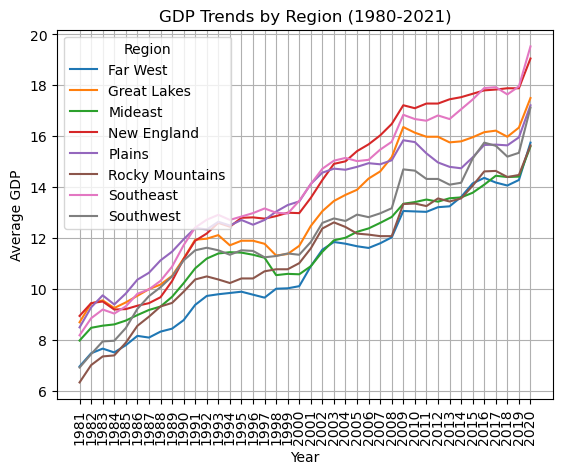

In [ ]:
import matplotlib.pyplot as plt

# Step 1: Reshape the DataFrame (convert columns for years into rows)
reshaped_df = state_gdp_df.melt(
    id_vars=["State", "Region"], 
    value_vars= [str(year) for year in range(1981, 2021)],  # Columns for years
    var_name="Year", 
    value_name="GDP"
)

# Step 2: Convert GDP values to numeric (strip '%', if needed)
#reshaped_df["GDP"] = reshaped_df["GDP"].replace('%', '', regex=True).astype(float)

# Step 3: Group by Region and Year to calculate average GDP
regional_gdp = reshaped_df.groupby(["Region", "Year"])["GDP"].mean().reset_index()

# Step 4: Plot the line chart
for region in regional_gdp["Region"].unique():
    region_data = regional_gdp[regional_gdp["Region"] == region]
    plt.plot(region_data["Year"], region_data["GDP"], label=region)

# Customize the chart
plt.xlabel("Year")
plt.xticks(rotation = 90)
plt.ylabel("Average GDP")
plt.title("GDP Trends by Region (1981-2021)")
plt.legend(title="Region")
plt.grid()
plt.show()




In [12]:

print(state_gdp_df.to_string())

                   State           Region  1980  1981  1982  1983  1984  1985  1986  1987  1988  1989  1990  1991  1992  1993  1994  1995  1996  1997  1998  1999  2000  2001  2002  2003  2004  2005  2006  2007  2008  2009  2010  2011  2012  2013  2014  2015  2016  2017  2018  2019  2020        avg
0            Connecticut      New England   7.7   7.9   8.2   8.3   8.0   8.0   8.2   8.4   8.8   9.5  10.0  10.8  11.0  11.4  11.4  11.2  11.0  10.7  11.0  11.0  10.6  11.1  11.8  12.1  12.0  11.9  11.8  11.7  12.1  13.2  13.4  13.7  13.7  14.0  14.3  14.2  14.4  14.4  14.5  14.6  16.1  11.417073
1                  Maine      New England   9.5   9.9  10.4  10.5  10.1  10.2  10.2  10.3  10.6  11.1  12.1  13.0  13.2  13.7  13.5  13.9  14.6  15.0  15.5  15.7  15.6  16.4  17.2  18.1  18.3  18.7  19.1  19.5  20.2  20.6  20.5  21.0  21.0  20.8  20.8  21.3  21.5  21.6  21.8  22.0  23.0  16.146341
2          Massachusetts      New England   9.6   9.8  10.2  10.0   9.6   9.4   9.5   9.7  10.1  10.9  

# EDA FOR PROVIDER PERSONAL CARE

In [38]:
# load the data
master_path = "datasets"
state_care_df = pd.read_csv(f"{master_path}/provider_personal_care.csv", delimiter=";")
state_care_df.head()

,State,Region,1980,1981,1982,1983,1984,1985,1986,1987,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Connecticut,New England,"3,135","3,612","4,134","4,587","5,083","5,551","6,171","6,946",...,"31,849","33,053","33,864","35,243","36,774","38,059","38,987","40,587","42,192","44,372"
1,Maine,New England,975,"1,113","1,259","1,388","1,512","1,640","1,779","1,969",...,"11,040","11,254","11,325","11,759","12,356","12,940","13,489","14,273","15,037","15,912"
2,Massachusetts,New England,"6,681","7,622","8,528","9,306","10,202","11,005","12,099","13,485",...,"66,222","68,298","69,806","72,256","76,803","80,436","82,772","86,111","89,902","93,737"
3,New Hampshire,New England,672,795,912,"1,015","1,138","1,294","1,481","1,733",...,"11,163","11,497","11,781","12,086","12,585","13,091","13,656","14,255","14,826","15,631"
4,Rhode Island,New England,982,"1,107","1,238","1,393","1,535","1,699","1,867","2,028",...,"9,196","9,425","9,582","10,047","10,510","10,756","10,917","11,110","11,619","12,361"


In [39]:
state_care_df.isnull().sum()

State     0
Region    0
1980      0
1981      0
1982      0
1983      0
1984      0
1985      0
1986      0
1987      0
1988      0
1989      0
1990      0
1991      0
1992      0
1993      0
1994      0
1995      0
1996      0
1997      0
1998      0
1999      0
2000      0
2001      0
2002      0
2003      0
2004      0
2005      0
2006      0
2007      0
2008      0
2009      0
2010      0
2011      0
2012      0
2013      0
2014      0
2015      0
2016      0
2017      0
2018      0
2019      0
2020      0
dtype: int64

In [40]:
state_care_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 43 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   State   51 non-null     object
 1   Region  51 non-null     object
 2   1980    51 non-null     object
 3   1981    51 non-null     object
 4   1982    51 non-null     object
 5   1983    51 non-null     object
 6   1984    51 non-null     object
 7   1985    51 non-null     object
 8   1986    51 non-null     object
 9   1987    51 non-null     object
 10  1988    51 non-null     object
 11  1989    51 non-null     object
 12  1990    51 non-null     object
 13  1991    51 non-null     object
 14  1992    51 non-null     object
 15  1993    51 non-null     object
 16  1994    51 non-null     object
 17  1995    51 non-null     object
 18  1996    51 non-null     object
 19  1997    51 non-null     object
 20  1998    51 non-null     object
 21  1999    51 non-null     object
 22  2000    51 non-null     obje

In [41]:
state_care_df.describe()

,State,Region,1980,1981,1982,1983,1984,1985,1986,1987,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
count,51,51,51,51,51,51,51,51,51,51,...,51,51,51,51,51,51,51,51,51,51
unique,51,8,51,51,51,51,51,51,51,51,...,51,51,50,51,51,51,51,51,51,51
top,Connecticut,Southeast,"3,135","3,612","4,134","4,587","5,083","5,551","6,171","6,946",...,"31,849","33,053","7,640","35,243","36,774","38,059","38,987","40,587","42,192","44,372"
freq,1,12,1,1,1,1,1,1,1,1,...,1,1,2,1,1,1,1,1,1,1


In [42]:
grouped = state_care_df.groupby("Region")

for name, group in grouped:
    print(f"Group: {name}")
    print(group)

Group: Far West
         State    Region    1980    1981    1982    1983    1984    1985  \
45      Alaska  Far West     463     528     596     693     771     893   
46  California  Far West  26,364  30,765  34,858  37,931  41,104  46,163   
47      Hawaii  Far West     903   1,075   1,240   1,345   1,447   1,622   
48      Nevada  Far West     830   1,011   1,143   1,278   1,379   1,533   
49      Oregon  Far West   2,366   2,745   3,044   3,286   3,532   3,844   
50  Washington  Far West   3,739   4,370   4,933   5,449   5,931   6,665   

      1986    1987  ...     2011     2012     2013     2014     2015     2016  \
45     953   1,002  ...    6,460    6,923    7,069    7,412    8,117    8,382   
46  50,075  55,095  ...  255,584  269,544  280,043  291,995  315,465  331,182   
47   1,748   1,951  ...    8,984    9,513    9,823   10,334   11,141   11,586   
48   1,705   1,867  ...   16,081   16,366   17,131   18,658   19,650   21,099   
49   4,184   4,468  ...   27,257   28,068   29

In [47]:
state_care_df[gdp_columns] = state_care_df[gdp_columns].replace(',', '', regex=True).astype(int)

state_care_df["avg"] = state_care_df[gdp_columns].mean(axis=1)

print(state_care_df)

                   State           Region   1980   1981   1982   1983   1984  \
0            Connecticut      New England   3135   3612   4134   4587   5083   
1                  Maine      New England    975   1113   1259   1388   1512   
2          Massachusetts      New England   6681   7622   8528   9306  10202   
3          New Hampshire      New England    672    795    912   1015   1138   
4           Rhode Island      New England    982   1107   1238   1393   1535   
5                Vermont      New England    386    447    521    564    598   
6               Delaware          Mideast    526    595    685    758    860   
7   District of Columbia          Mideast   1345   1525   1721   1880   2091   
8               Maryland          Mideast   4059   4657   5167   5665   6363   
9             New Jersey          Mideast   6339   7304   8203   9168  10460   
10              New York          Mideast  19073  21438  23610  26005  28948   
11          Pennsylvania          Mideas

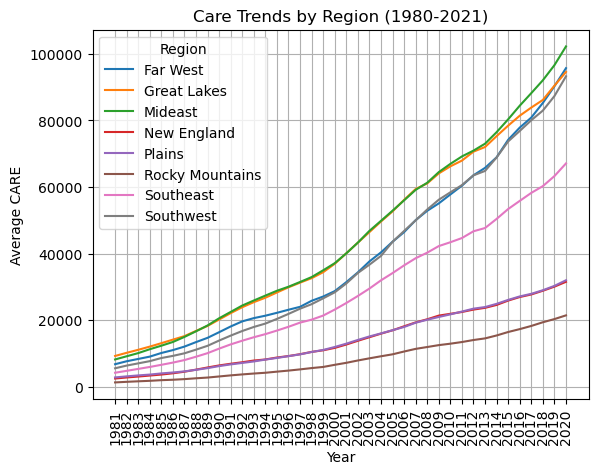

In [ ]:
import matplotlib.pyplot as plt

#Reshape the DataFrame (convert columns for years into rows)
reshaped_df = state_care_df.melt(
    id_vars=["State", "Region"], 
    value_vars= [str(year) for year in range(1981, 2021)],  # Columns for years
    var_name="Year", 
    value_name="CARE"
)


regional_gdp = reshaped_df.groupby(["Region", "Year"])["CARE"].mean().reset_index()


for region in regional_gdp["Region"].unique():
    region_data = regional_gdp[regional_gdp["Region"] == region]
    plt.plot(region_data["Year"], region_data["CARE"], label=region)


plt.xlabel("Year")
plt.xticks(rotation = 90)
plt.ylabel("Average CARE")
plt.title("Provider Personal Care Trends by Region (1980-2021)")
plt.legend(title="Region")
plt.grid()
plt.show()

In [51]:
print(state_gdp_df.to_string())

                   State           Region  1980  1981  1982  1983  1984  1985  1986  1987  1988  1989  1990  1991  1992  1993  1994  1995  1996  1997  1998  1999  2000  2001  2002  2003  2004  2005  2006  2007  2008  2009  2010  2011  2012  2013  2014  2015  2016  2017  2018  2019  2020        avg
0            Connecticut      New England   7.7   7.9   8.2   8.3   8.0   8.0   8.2   8.4   8.8   9.5  10.0  10.8  11.0  11.4  11.4  11.2  11.0  10.7  11.0  11.0  10.6  11.1  11.8  12.1  12.0  11.9  11.8  11.7  12.1  13.2  13.4  13.7  13.7  14.0  14.3  14.2  14.4  14.4  14.5  14.6  16.1  11.417073
1                  Maine      New England   9.5   9.9  10.4  10.5  10.1  10.2  10.2  10.3  10.6  11.1  12.1  13.0  13.2  13.7  13.5  13.9  14.6  15.0  15.5  15.7  15.6  16.4  17.2  18.1  18.3  18.7  19.1  19.5  20.2  20.6  20.5  21.0  21.0  20.8  20.8  21.3  21.5  21.6  21.8  22.0  23.0  16.146341
2          Massachusetts      New England   9.6   9.8  10.2  10.0   9.6   9.4   9.5   9.7  10.1  10.9  